In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df= pd.read_csv(r"C:\Users\anubh\OneDrive\Documents\Coding\DS-Python\ML-python\Algerian_forest_fires_Cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [118]:
## Encoding the category in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)


In [119]:
df.drop(columns=['day','month','year'],inplace=True)

In [120]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


<Axes: >

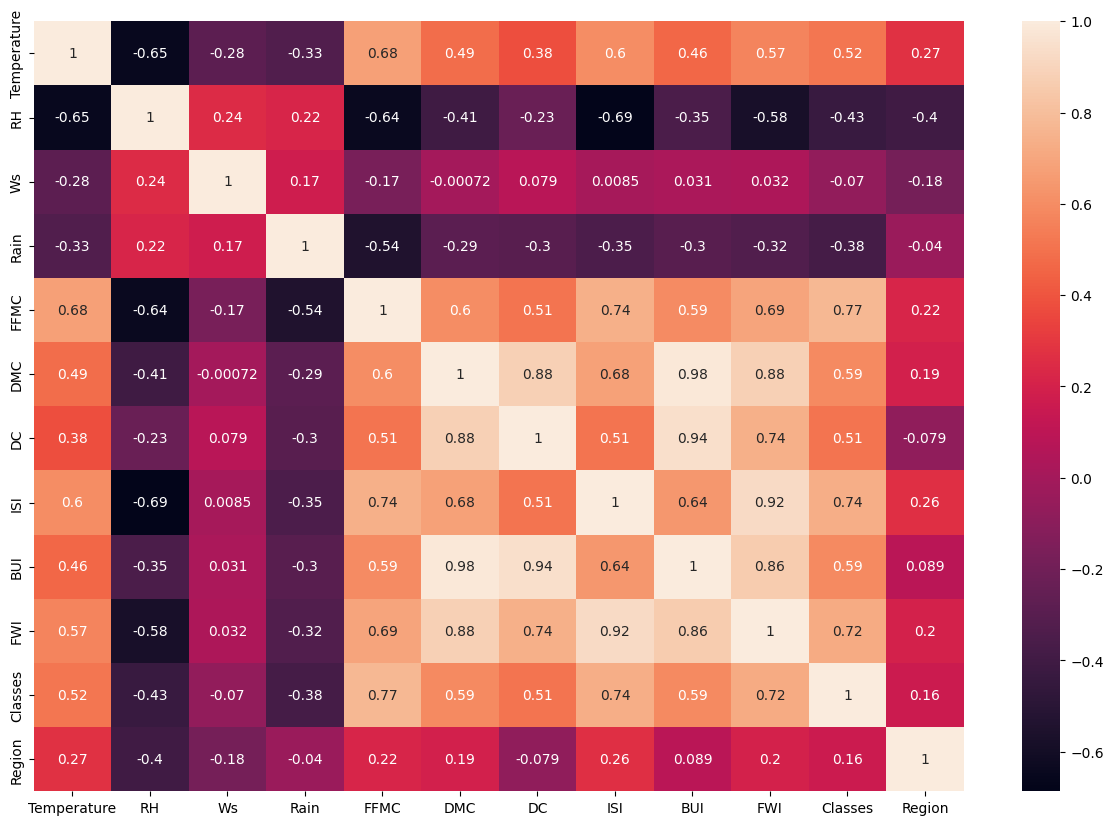

In [122]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [123]:
df.drop(columns=['DC','BUI'],inplace=True)

In [124]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'FWI',
       'Classes', 'Region'],
      dtype='object')

In [125]:
df.shape

(243, 10)

In [126]:
X=df[['Temperature','RH','Ws','Rain','FFMC','DMC','ISI','Classes', 'Region']]
y=df[['FWI']]

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (73, 9), (170, 1), (73, 1))

<Axes: >

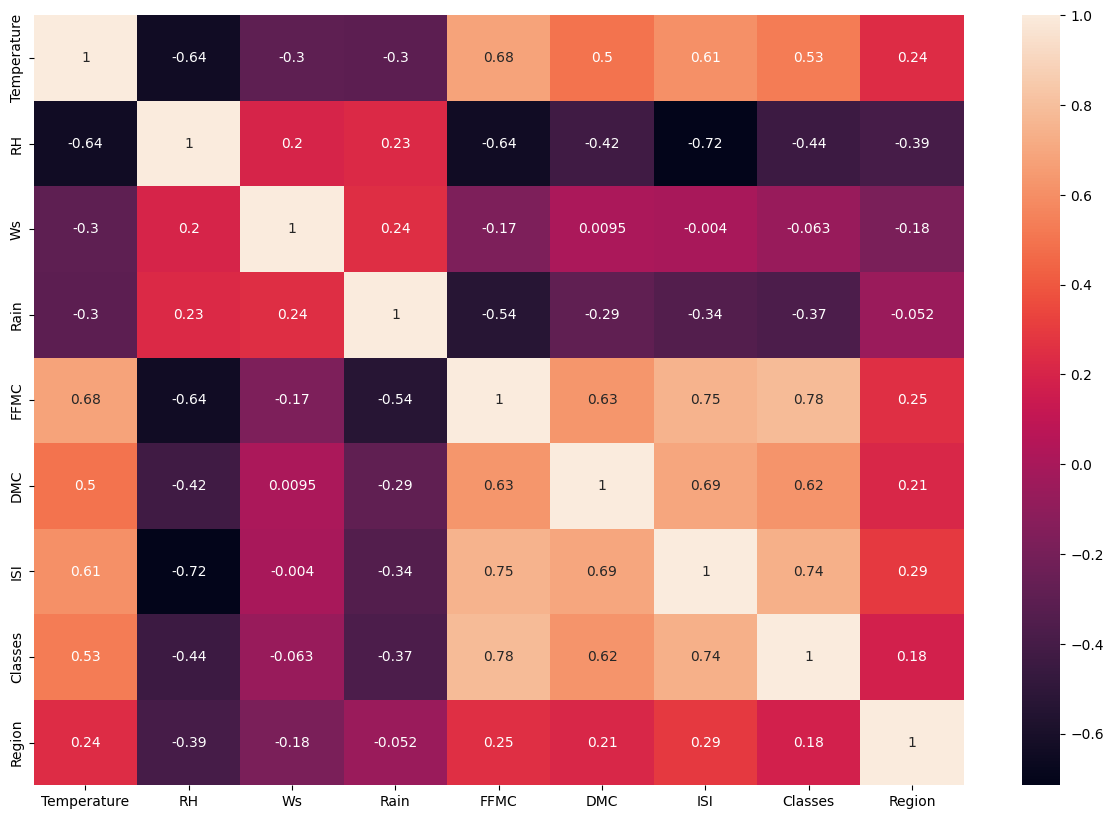

In [128]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [130]:
X_train_scaled,X_test_scaled

(array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
          0.90992142, -1.        ],
        [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
         -1.098996  , -1.        ],
        [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
         -1.098996  , -1.        ],
        ...,
        [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
         -1.098996  , -1.        ],
        [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
          0.90992142,  1.        ],
        [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
         -1.098996  , -1.        ]], shape=(170, 9)),
 array([[-2.83761359e-01,  8.39147711e-02, -2.09234040e-01,
         -3.85823876e-01,  6.47089705e-01, -5.89987708e-02,
          2.23102774e-01,  9.09921419e-01, -1.00000000e+00],
        [ 2.61316957e-01, -5.92175802e-01, -9.74175691e-01,
         -3.85823876e-01,  7.52243844e-01, -3.92549439e-01,
          3.86281817e-01,  9.09921419e-01, -1.00000000e+

## Box plot to understand the effect of outliers

Text(0.5, 1.0, 'Data after scaling')

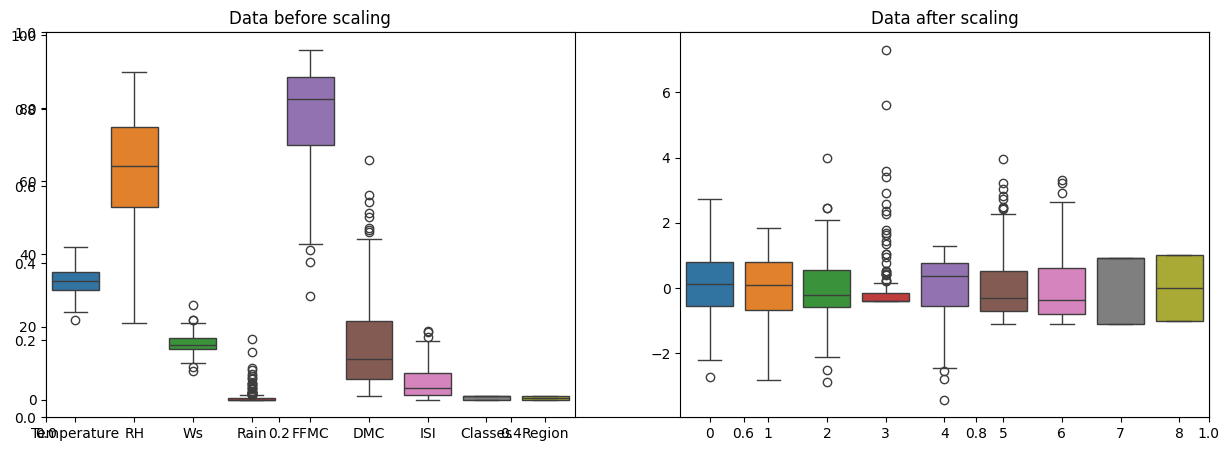

In [131]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Data before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Data after scaling')

## Linear regression Model

In [132]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [133]:
reg.coef_

array([[-0.06743838, -0.22114448, -0.01027585, -0.03604682, -0.79405484,
         3.78370099,  4.77116003,  0.39717583, -0.40052359]])

In [134]:
y_pred_test=reg.predict(X_test_scaled)
y_pred_test



array([[ 8.23360696],
       [ 7.78722107],
       [-0.22177116],
       [ 4.39135528],
       [ 6.70592296],
       [ 1.35953506],
       [ 2.02415841],
       [ 7.8516723 ],
       [ 1.75663548],
       [ 3.38790696],
       [ 0.39843202],
       [ 9.78342355],
       [ 9.3680429 ],
       [17.02412949],
       [18.46678047],
       [ 1.28447171],
       [ 2.01974049],
       [-0.09674534],
       [ 7.16308095],
       [ 3.09554477],
       [ 1.3948961 ],
       [ 0.19327515],
       [ 6.62808682],
       [ 0.32210713],
       [21.04727034],
       [ 5.13157559],
       [ 5.95532504],
       [ 9.78959081],
       [-0.06796045],
       [ 9.76497644],
       [ 6.59924366],
       [-0.387537  ],
       [10.38507383],
       [14.54281104],
       [ 1.53715626],
       [ 0.46674514],
       [ 2.03514668],
       [ 6.13251187],
       [-0.54362262],
       [-0.46304533],
       [ 6.70500727],
       [ 1.89676328],
       [ 8.66404566],
       [-0.36816504],
       [15.4491936 ],
       [ 8

In [135]:
## Performance Metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse= np.sqrt(mse)
print('mse=',mse,'mae=',mae,'rmse=',rmse)

mse= 0.6829306792403734 mae= 0.5648036371485077 rmse= 0.8263961999188848


In [136]:
## Rsquared and adjusted R squared 

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)
score

0.9847206874554418

In [137]:
## adjusted r squared score--> formula
1 - ((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

0.9825379285205049

## Lasso Regression

In [138]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
print(y_pred)

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
print('mse=',mse,'mae=',mae,'rmse=',rmse)

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
score

[ 7.83433463  7.46042415  1.04324909  5.56610756  7.14964183  2.97301507
  3.27651337  7.87998098  2.63503891  3.91701712  1.48368645  9.92046372
  9.37562209 15.76074812 16.3220992   2.92736872  2.55685777 -0.42665548
  7.08505719  4.04278685  2.7676069   0.81259015  6.44212543  0.78393984
 19.20315042  5.75306239  5.85309558  9.16195919 -0.66459844  9.82479994
  6.55478443  1.0481051   9.61842106 13.06616596  2.55831424  2.26598444
  2.57482452  6.43629872  0.35370028  0.37263856  6.31247122  2.91522868
  8.1033559  -0.56942125 14.49188065  7.95816212  8.54864928  2.02124323
 12.43731648  1.86876543 25.90488715  6.06481624 15.92779313 17.15295732
 12.51258384 14.37825178  2.34222334  9.11874084  4.6682368  13.65519581
  5.83609954  1.97316887  0.81501816 19.91892153  3.89807884  2.5277217
  9.09009053  7.35553494 10.14626581 -0.42908348  7.80762656 11.99882136
 13.68578836]
mse= 2.1840267665734507 mae= 1.1203368882393199 rmse= 1.477845312126222


0.9511364350928344

## Ridge Regression

In [139]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
print(y_pred)

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
print('mse=',mse,'mae=',mae,'rmse=',rmse)

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
score

[ 8.24962726  7.80946713 -0.17003165  4.4226591   6.74705507  1.37691818
  2.08773402  7.95803442  1.7189777   3.45729966  0.44774894  9.80252346
  9.39160627 17.00156349 18.41972661  1.36386792  1.9952883  -0.20880036
  7.16224774  3.18844267  1.40073739  0.16739484  6.66537725  0.33881839
 20.93758091  5.24278402  5.99704535  9.80660572 -0.19027952  9.79003355
  6.60643159 -0.36463197 10.39519073 14.53424425  1.58591424  0.51403836
  2.09448305  6.23707848 -0.59822159 -0.42904813  6.76969959  1.91540717
  8.67772684 -0.45215476 15.41944507  8.32353143  8.20033919  1.43204995
 12.93549616  1.26460225 29.42753944  5.69308671 17.21138355 19.35943547
 13.77015506 16.15022823  0.73399533  9.04043205  3.66250385 14.68424481
  5.25976259  0.82034838 -0.51356008 21.78721783  3.29506637  1.81442143
  9.72306717  7.01987741 10.57909526 -0.39347431  8.24779757 12.34155726
 15.07644394]
mse= 0.7079451074397779 mae= 0.5844876727578059 rmse= 0.8413947393701591


0.9841610358272455

## Elastic Net

In [140]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
print(y_pred)

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
print('mse=',mse,'mae=',mae,'rmse=',rmse)

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
score

[ 8.45298159  8.51407938  1.62989041  5.73680672  8.01080626  3.76023091
  4.65897183  9.88063099  2.40100091  4.47224778  1.68999528  9.26276685
  9.99652743 14.80632131 14.98345831  3.86856561  3.0705475  -1.06955003
  7.61763266  6.39118439  2.71857512  0.74088594  7.70882687  1.04761128
 17.12353069  8.07929627  7.10561452  9.69442208 -1.64241851  9.99218073
  6.75497275  1.83042749  9.67867758 12.57038598  3.27409495  2.97021721
  4.2071267   8.47767718 -0.11826193 -0.27575852  8.04499169  3.64525244
  9.05467162 -1.10096687 14.02401957  8.45748025  8.60120965  2.34455718
 12.19621103  2.15807713 22.49200621  8.35649765 14.2976588  15.38582833
 12.04683337 13.26352727  3.2362427   9.64097295  5.96376416 13.84232378
  7.42562028  2.02911441  1.09290225 17.76959194  4.18027979  3.63075888
  9.60826823  8.54965493 11.20961428 -1.04930131  8.87089239 12.26839308
 12.67050917]
mse= 5.345346375670643 mae= 1.855468747971755 rmse= 2.312000513769546


0.8804077479376988

In [141]:
import pickle

pickle.dump(scaler,open('scaler_model_train.pkl','wb'))
pickle.dump(ridge,open('ridge_model_train.pkl','wb'))